In [1]:
import numpy as np
from imports import *

Tomo = Tomography()

In [2]:
#Specify the shape of the images, the number of images in the sequence and load the image sequence using the gen_seq_function
nx= 64

ny = nx
shape = (nx,ny)
size = nx*ny
t_end = 5

v_max = 2
v_min = 1
padding = 2
data = gen_im_seq(shape,t_end,v_max=v_max,v_min=v_min, padding =padding)
u_traj = data.u_traj
u_inv_traj = data.u_inv_traj
v_primes=data.v_primes
vs=data.vs

# A list of the locations of all pixels
R = np.array(list(np.ndindex(*shape)))
# u_traj = [u*10 for u in u_traj]

plt.set_cmap('inferno')
# u_traj_ = np.load('mnist_test_seq.npy')[:,0,:,:][0:t_end]#*10
# u_traj = [vec(u) for u in u_traj_]
# u_inv_traj=u_traj[::-1]

# v_max = 3

<Figure size 640x480 with 0 Axes>

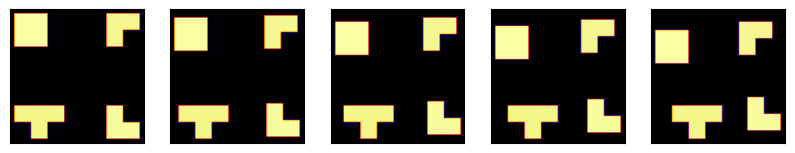

In [4]:
fig,ax=plt.subplots(1,t_end,figsize=(10,5))
for i in range(0,t_end):
    ax[i].imshow(u_traj[i].reshape(shape))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## Case: A; Views:5; NL:1%

In [5]:
#Generate the sinogram and the operator
views = 5
noise_level = 1e-2
x_traj = u_traj


X_true, A_bar,data_vec_bar,data_vec_true_bar,b_shape,L_bar, I_bar,deltas = gen_joint_tomo_op_and_data(x_traj, t_end, nx,ny, views,
                                                                           noise_level, case='a')
b_size = b_shape[0]*b_shape[1]
delta = np.mean(deltas) #la.norm(data_vec_true_bar-data_vec_bar)
print(delta)


[  0.  36.  72. 108. 144.]
[  7.2  43.2  79.2 115.2 151.2]
[ 14.4  50.4  86.4 122.4 158.4]
[ 21.6  57.6  93.6 129.6 165.6]
[ 28.8  64.8 100.8 136.8 172.8]
2.8850302734374997


Text(0.5, 0.98, 'Noisy sinograms of the images in the sequence')

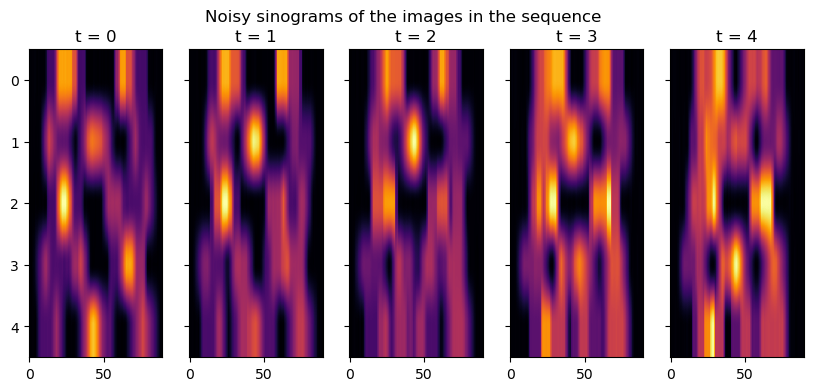

In [57]:
fig,ax=plt.subplots(1,t_end, sharey=True, figsize=(10,4))
data_vec_bar_list_c = [data_vec_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
data_vec_true_bar_list_c = [data_vec_true_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
for i in range(0,t_end):
    ax[i].imshow(data_vec_bar_list_c[i].reshape(b_shape),aspect='auto')
    ax[i].set_title(f't = {i}')
fig.suptitle('Noisy sinograms of the images in the sequence')

In [9]:

n_iter = 200
n_iter_b = 40
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg =   True
size=nx*ny
shape = (nx,ny)
v_max = 2
interval = n_iter//4

nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)

def run_all_methods(i):
    if (i == 1):
        return MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)
    elif (i==2):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    elif(i==3):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    
    elif (i==4):
        return  MMGKS2(A_bar, data_vec_bar, L, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)

from multiprocessing.pool import ThreadPool

with ThreadPool(5) as p:
    result = p.map(run_all_methods, [1, 2,3,4])


generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]




running MMGKS...:   0%|          | 0/200 [00:00<?, ?it/s]


























































































































































































running MMGKS...:   0%|          | 1/200 [00:09<31:27,  9.49s/it]

running MMGKS...:   1%|          | 2/200 [00:09<13:10,  3.99s/it]


running MMGKS...:   2%|▏         | 3/200 [00:09<07:22,  2.25s/it]


running MMGKS...:   2%|▏         | 4/200 [00:09<04:38,  1.42s/it]


running MMGKS...:   3%|▎         | 6/200 [00:10<02:16,  1.42it/s]


running MMGKS...:   4%|▍         | 8/200 [00:10<01:20,  2.40it/s]


running MMGKS...:   4%|▍         | 9/200 [00:10<01:08,  2.81it/s]


running MMGKS...:   5%|▌         | 10/200 [00:11<01:00,  3.12it/s]


running MMGKS...:   6%|▌         | 11/200 [00:11<00:54,  3.44it/s]


running MMGKS...:   6%|▌         | 12/200 [00:11<00:51,  3.64it/s]


running M

In [10]:
(X_mmgks, info_mmgks) = result[0]
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]
print('MMGKS Solution relative error:', error_mmgks)

(X_mmgks_OF, info_mmgks_OF, vs_est, v_primes_est) = result[1]

error_mmgks_OF = info_mmgks_OF['relError'][-1]
Ms_OF = info_mmgks_OF['Ms']

X_mmgks_OF[X_mmgks_OF<0]=0
X_mmgks_OF_list = [X_mmgks_OF[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS-OF Solution relative error:', error_mmgks_OF)

(X_aniso, info_aniso) = result[3]
error_aniso = info_aniso['relError'][-1]

X_aniso[X_aniso<0]=0
X_aniso_list = [X_aniso[size*i:size*(i+1)] for i in range(t_end)]

print('ANISO-TV Solution relative error:', error_aniso)

(X_mmgks_OF_dyn, info_mmgks_OF_dyn, vs_est_dyn, v_primes_est_dyn) = result[2]

error_mmgks_OF_dyn = info_mmgks_OF_dyn['relError'][-1]
Ms = info_mmgks_OF_dyn['Ms']

X_mmgks_OF_dyn[X_mmgks_OF_dyn<0]=0
X_mmgks_OF_dyn_list = [X_mmgks_OF_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS-OF Solution relative error:', error_mmgks_OF_dyn)



MMGKS Solution relative error: 0.3623557877950322
MMGKS-OF Solution relative error: 0.20178591561970713
ANISO-TV Solution relative error: 0.24935750495330128
Dynamic MMGKS-OF Solution relative error: 0.21505477188758368


In [11]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_OF',rre_all(X_mmgks_OF,X_true,nt,nx,ny))
print('RRE_ANISO-TV',rre_all(X_aniso,X_true,nt,nx,ny))
print('RRE_MMGKS_OF_DYN',rre_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF',ssim_all(X_mmgks_OF,X_true,nt,nx,ny))
print('SSIM_ANISO-TV',ssim_all(X_aniso,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF_dyn',ssim_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))

RRE_MMGKS 0.36032279867606665
RRE_MMGKS_OF 0.2010719710623375
RRE_ANISO-TV 0.24778968269644305
RRE_MMGKS_OF_DYN 0.21357657661101737
SSIM_MMGKS 0.897166812320406
SSIM_MMGKS_OF 0.9709867429237307
SSIM_ANISO-TV 0.9543522974542743
SSIM_MMGKS_OF_dyn 0.966485258039506


In [12]:
rec_list = [X_mmgks_OF_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_OF_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.12592316840070963
SSIM_optical_flow_rec 0.9878569831250446


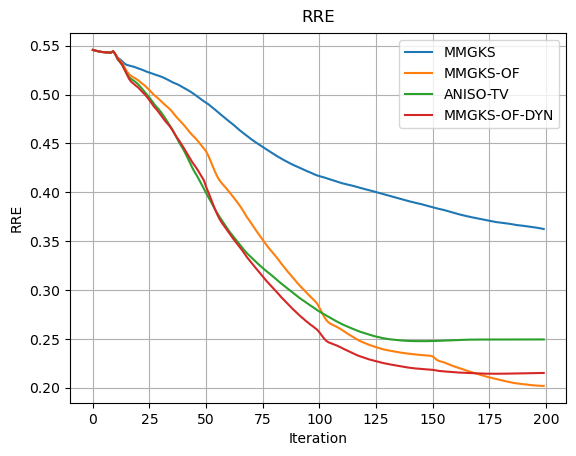

In [13]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_mmgks_OF['relError'],label='MMGKS-OF')
plt.plot(info_aniso['relError'],label='ANISO-TV')
plt.plot(info_mmgks_OF_dyn['relError'],label='MMGKS-OF-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

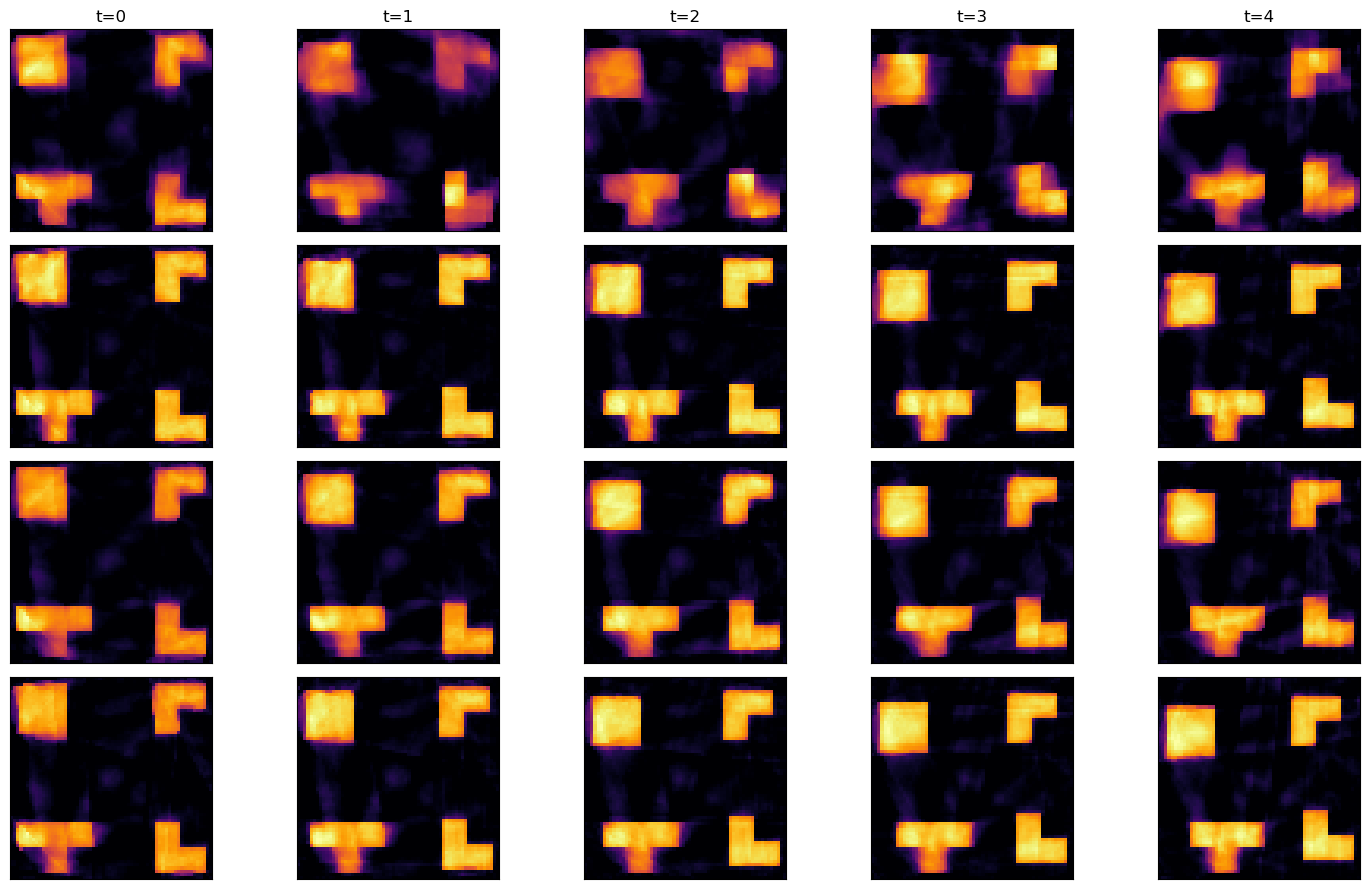

In [14]:
fig,ax=plt.subplots(4,t_end,figsize=(15,9),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[1,i].imshow(X_mmgks_OF_list[i].reshape(shape))
    ax[3,i].imshow(X_mmgks_OF_dyn_list[i].reshape(shape))
    ax[2,i].imshow(X_aniso_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [92]:
print('RRE_MMGKS',rre_all(X_mmgks,np.array(u_traj),nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,np.array(u_traj),nt,nx,ny))
print('RRE_GS',rre_all(X_GS,np.array(u_traj),nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,np.array(u_traj),nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,np.array(u_traj),nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,np.array(u_traj),nt,nx,ny))

RRE_MMGKS 0.5175867577760742
RRE_MMGKS_DYN 0.3353263656811101
RRE_GS 0.35281359539535256
SSIM_MMGKS 0.7615968608665618
SSIM_MMGKS_DYN 0.9121039196040404
SSIM_GS 0.9054116785420275


In [62]:
case_a_folder = 'example_1/case_a'
np.save(f'{case_a_folder}/X_mmgks.npy',X_mmgks)
np.save(f'{case_a_folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{case_a_folder}/X_GS.npy',X_GS)
np.save(f'{case_a_folder}/relError_mmgks.npy',info_mmgks['relError'])
np.save(f'{case_a_folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{case_a_folder}/relError_GS.npy',info_GS['relError'])
np.save(f'{case_a_folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
np.save(f'{case_a_folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{case_a_folder}/regParam_GS.npy',info_GS['regParam_history'])

## Case b

In [15]:
#Generate the sinogram and the operator
views = 5
noise_level = 1e-2
x_traj = u_traj


X_true, A_bar,data_vec_bar,data_vec_true_bar,b_shape,L_bar, I_bar,deltas = gen_joint_tomo_op_and_data(x_traj, t_end, nx,ny, views,
                                                                           noise_level, case='b')
b_size = b_shape[0]*b_shape[1]
delta = np.mean(deltas) #la.norm(data_vec_true_bar-data_vec_bar)
print(delta)


[ 0.   7.2 14.4 21.6 28.8]
[36.  43.2 50.4 57.6 64.8]
[ 72.   79.2  86.4  93.6 100.8]
[108.  115.2 122.4 129.6 136.8]
[144.  151.2 158.4 165.6 172.8]
2.8481065063476563


Text(0.5, 0.98, 'Noisy sinograms of the images in the sequence')

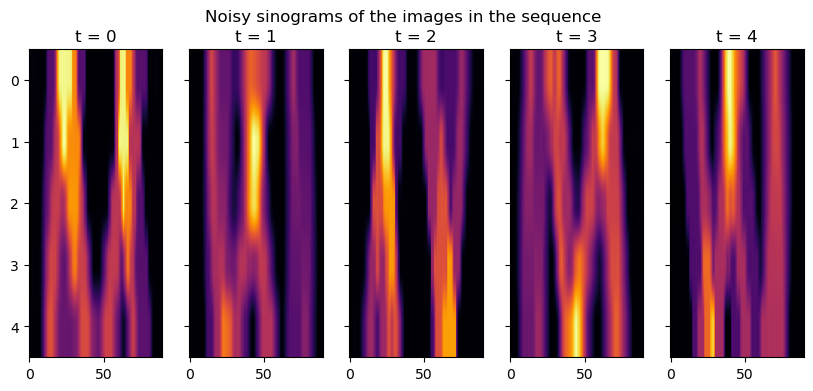

In [16]:
fig,ax=plt.subplots(1,t_end, sharey=True, figsize=(10,4))
data_vec_bar_list_c = [data_vec_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
data_vec_true_bar_list_c = [data_vec_true_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
for i in range(0,t_end):
    ax[i].imshow(data_vec_bar_list_c[i].reshape(b_shape),aspect='auto')
    ax[i].set_title(f't = {i}')
fig.suptitle('Noisy sinograms of the images in the sequence')

In [17]:

n_iter = 200
n_iter_b = 40
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg =   True
size=nx*ny
shape = (nx,ny)
v_max = 2
interval = n_iter//4

nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)

def run_all_methods(i):
    if (i == 1):
        return MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)
    elif (i==2):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    elif(i==3):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    
    elif (i==4):
        return  MMGKS2(A_bar, data_vec_bar, L, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)

from multiprocessing.pool import ThreadPool

with ThreadPool(5) as p:
    result = p.map(run_all_methods, [1, 2,3,4])



generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]




generating basis...: 100%|██████████| 10/10 [00:00<00:00, 79.76it/s]




















































































































































































































































running MMGKS...:   2%|▏         | 3/200 [00:14<10:39,  3.24s/it]


running MMGKS...:   2%|▏         | 4/200 [00:14<06:35,  2.02s/it]


running MMGKS...:   2%|▎         | 5/200 [00:14<04:23,  1.35s/it]


running MMGKS...:   4%|▎         | 7/200 [00:14<02:15,  1.42it/s]


running MMGKS...:   4%|▍         | 8/200 [00:15<01:46,  1.80it/s]


running MMGKS...:   4%|▍         | 9/200 [00:15<01:24,  2.26it/s]


running MMGKS...:   6%|▌         | 11/200 [00:15<01:02,  3.00it/s]


running MMGKS...:   6%|▌         | 12/200 [00:16<01:01,  3.06it/s]



running MMGKS...:   6%|▋         | 13/200 [00:16<00:59,  3.13it/s]


running MMGKS...:   7%|▋         | 14/200 [00:16<00:55,  3.33it/s]




In [18]:
(X_mmgks, info_mmgks) = result[0]
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]
print('MMGKS Solution relative error:', error_mmgks)

(X_mmgks_OF, info_mmgks_OF, vs_est, v_primes_est) = result[1]

error_mmgks_OF = info_mmgks_OF['relError'][-1]
Ms_OF = info_mmgks_OF['Ms']

X_mmgks_OF[X_mmgks_OF<0]=0
X_mmgks_OF_list = [X_mmgks_OF[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS-OF Solution relative error:', error_mmgks_OF)

(X_aniso, info_aniso) = result[3]
error_aniso = info_aniso['relError'][-1]

X_aniso[X_aniso<0]=0
X_aniso_list = [X_aniso[size*i:size*(i+1)] for i in range(t_end)]

print('ANISO-TV Solution relative error:', error_aniso)

(X_mmgks_OF_dyn, info_mmgks_OF_dyn, vs_est_dyn, v_primes_est_dyn) = result[2]

error_mmgks_OF_dyn = info_mmgks_OF_dyn['relError'][-1]
Ms = info_mmgks_OF_dyn['Ms']

X_mmgks_OF_dyn[X_mmgks_OF_dyn<0]=0
X_mmgks_OF_dyn_list = [X_mmgks_OF_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS-OF Solution relative error:', error_mmgks_OF_dyn)



MMGKS Solution relative error: 0.5621933652315668
MMGKS-OF Solution relative error: 0.4082012891817919
ANISO-TV Solution relative error: 0.39581783233799855
Dynamic MMGKS-OF Solution relative error: 0.3592014592571746


In [19]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_OF',rre_all(X_mmgks_OF,X_true,nt,nx,ny))
print('RRE_ANISO-TV',rre_all(X_aniso,X_true,nt,nx,ny))
print('RRE_MMGKS_OF_DYN',rre_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF',ssim_all(X_mmgks_OF,X_true,nt,nx,ny))
print('SSIM_ANISO-TV',ssim_all(X_aniso,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF_dyn',ssim_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))

RRE_MMGKS 0.5609487414507262
RRE_MMGKS_OF 0.40098435049143505
RRE_ANISO-TV 0.39138596065311887
RRE_MMGKS_OF_DYN 0.35292817325006187
SSIM_MMGKS 0.7141101411464214
SSIM_MMGKS_OF 0.870538480588951
SSIM_ANISO-TV 0.8817627603383599
SSIM_MMGKS_OF_dyn 0.9042084713792644


In [20]:
rec_list = [X_mmgks_OF_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_OF_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.15252784293300556
SSIM_optical_flow_rec 0.9824681776993174


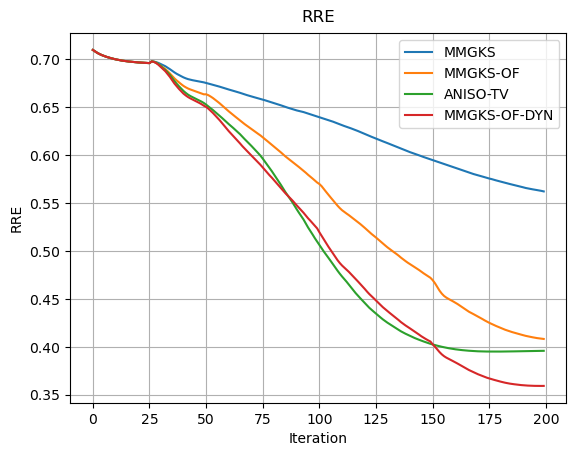

In [21]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_mmgks_OF['relError'],label='MMGKS-OF')
plt.plot(info_aniso['relError'],label='ANISO-TV')
plt.plot(info_mmgks_OF_dyn['relError'],label='MMGKS-OF-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

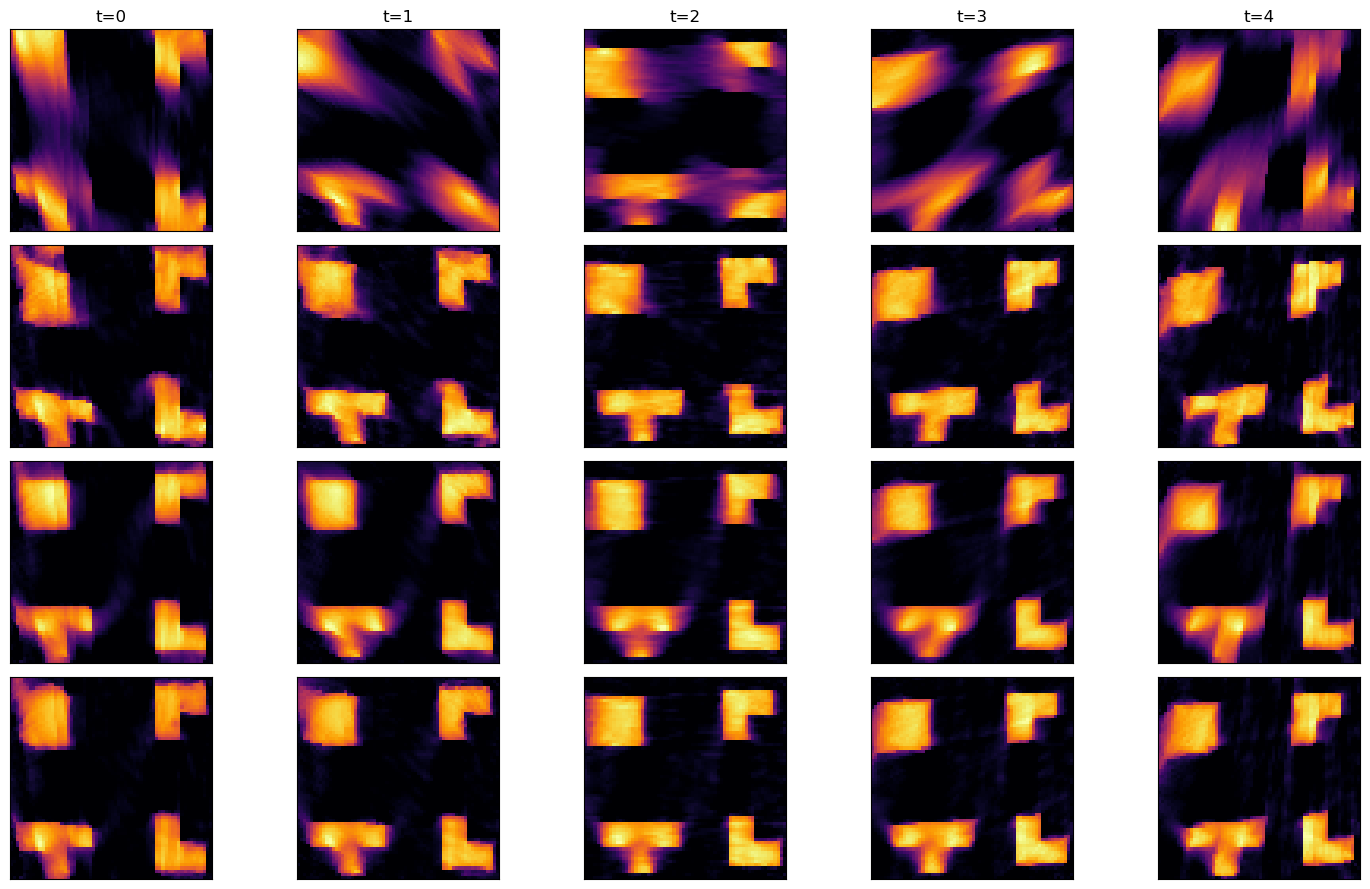

In [22]:
fig,ax=plt.subplots(4,t_end,figsize=(15,9),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[1,i].imshow(X_mmgks_OF_list[i].reshape(shape))
    ax[3,i].imshow(X_mmgks_OF_dyn_list[i].reshape(shape))
    ax[2,i].imshow(X_aniso_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [68]:
case_b_folder = 'example_1/case_b'
# np.save(f'{case_b_folder}/X_mmgks.npy',X_mmgks)
# np.save(f'{case_b_folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{case_b_folder}/X_GS.npy',X_GS)
# np.save(f'{case_b_folder}/relError_mmgks.npy',info_mmgks['relError'])
# np.save(f'{case_b_folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{case_b_folder}/relError_GS.npy',info_GS['relError'])
# np.save(f'{case_b_folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
# np.save(f'{case_b_folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{case_b_folder}/regParam_GS.npy',info_GS['regParam_history'])

## Case c

In [24]:
#Generate the sinogram and the operator
views = 5
noise_level = 1e-2
x_traj = u_traj


X_true, A_bar,data_vec_bar,data_vec_true_bar,b_shape,L_bar, I_bar,deltas = gen_joint_tomo_op_and_data(x_traj, t_end, nx,ny, views,
                                                                           noise_level, case='c')
b_size = b_shape[0]*b_shape[1]
delta = np.mean(deltas) #la.norm(data_vec_true_bar-data_vec_bar)
print(delta)


[  0.  36.  72. 108. 144.]
[  0.  36.  72. 108. 144.]
[  0.  36.  72. 108. 144.]
[  0.  36.  72. 108. 144.]
[  0.  36.  72. 108. 144.]
2.93377734375


Text(0.5, 0.98, 'Noisy sinograms of the images in the sequence')

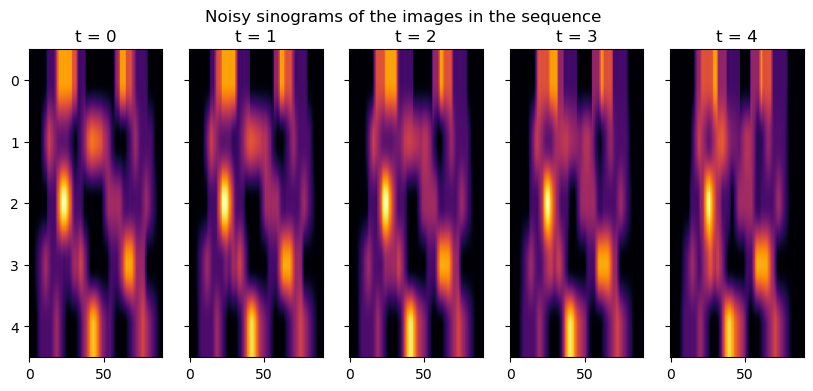

In [25]:
fig,ax=plt.subplots(1,t_end, sharey=True, figsize=(10,4))
data_vec_bar_list_c = [data_vec_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
data_vec_true_bar_list_c = [data_vec_true_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
for i in range(0,t_end):
    ax[i].imshow(data_vec_bar_list_c[i].reshape(b_shape),aspect='auto')
    ax[i].set_title(f't = {i}')
fig.suptitle('Noisy sinograms of the images in the sequence')

In [23]:

n_iter = 200
n_iter_b = 40
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg =   True
size=nx*ny
shape = (nx,ny)
v_max = 2
interval = n_iter//4

nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)

def run_all_methods(i):
    if (i == 1):
        return MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)
    elif (i==2):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    elif(i==3):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    
    elif (i==4):
        return  MMGKS2(A_bar, data_vec_bar, L, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)

from multiprocessing.pool import ThreadPool

with ThreadPool(5) as p:
    result = p.map(run_all_methods, [1, 2,3,4])

generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]


running MMGKS...:   0%|          | 0/200 [00:00<?, ?it/s]













































































































































































































































running MMGKS...:   0%|          | 1/200 [00:13<44:29, 13.42s/it]


running MMGKS...:   2%|▏         | 3/200 [00:13<10:12,  3.11s/it]


running MMGKS...:   2%|▎         | 5/200 [00:14<04:14,  1.31s/it]

running MMGKS...:   3%|▎         | 6/200 [00:14<02:59,  1.08it/s]


running MMGKS...:   4%|▎         | 7/200 [00:14<02:14,  1.44it/s]


running MMGKS...:   4%|▍         | 8/200 [00:14<01:44,  1.84it/s]


running MMGKS...:   4%|▍         | 9/200 [00:14<01:26,  2.21it/s]


running MMGKS...:   5%|▌         | 10/200 [00:15<01:14,  2.57it/s]



running MMGKS...:   6%|▌         | 11/200 [00:15<01:07,  2.80it/s]


running MMGKS...:   6%|▌     

In [ ]:
(X_mmgks, info_mmgks) = result[0]
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]
print('MMGKS Solution relative error:', error_mmgks)

(X_mmgks_OF, info_mmgks_OF, vs_est, v_primes_est) = result[1]

error_mmgks_OF = info_mmgks_OF['relError'][-1]
Ms_OF = info_mmgks_OF['Ms']

X_mmgks_OF[X_mmgks_OF<0]=0
X_mmgks_OF_list = [X_mmgks_OF[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS-OF Solution relative error:', error_mmgks_OF)

(X_aniso, info_aniso) = result[3]
error_aniso = info_aniso['relError'][-1]

X_aniso[X_aniso<0]=0
X_aniso_list = [X_aniso[size*i:size*(i+1)] for i in range(t_end)]

print('ANISO-TV Solution relative error:', error_aniso)

(X_mmgks_OF_dyn, info_mmgks_OF_dyn, vs_est_dyn, v_primes_est_dyn) = result[2]

error_mmgks_OF_dyn = info_mmgks_OF_dyn['relError'][-1]
Ms = info_mmgks_OF_dyn['Ms']

X_mmgks_OF_dyn[X_mmgks_OF_dyn<0]=0
X_mmgks_OF_dyn_list = [X_mmgks_OF_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS-OF Solution relative error:', error_mmgks_OF_dyn)



MMGKS Solution relative error: 0.3623557877950322
MMGKS-OF Solution relative error: 0.20178591561970713
ANISO-TV Solution relative error: 0.24935750495330128
Dynamic MMGKS-OF Solution relative error: 0.21505477188758368


In [ ]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_OF',rre_all(X_mmgks_OF,X_true,nt,nx,ny))
print('RRE_ANISO-TV',rre_all(X_aniso,X_true,nt,nx,ny))
print('RRE_MMGKS_OF_DYN',rre_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF',ssim_all(X_mmgks_OF,X_true,nt,nx,ny))
print('SSIM_ANISO-TV',ssim_all(X_aniso,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF_dyn',ssim_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))

RRE_MMGKS 0.36032279867606665
RRE_MMGKS_OF 0.2010719710623375
RRE_ANISO-TV 0.24778968269644305
RRE_MMGKS_OF_DYN 0.21357657661101737
SSIM_MMGKS 0.897166812320406
SSIM_MMGKS_OF 0.9709867429237307
SSIM_ANISO-TV 0.9543522974542743
SSIM_MMGKS_OF_dyn 0.966485258039506


In [ ]:
rec_list = [X_mmgks_OF_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_OF_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.12592316840070963
SSIM_optical_flow_rec 0.9878569831250446


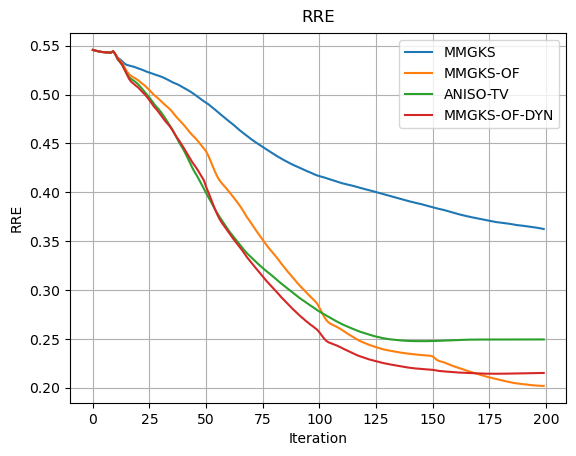

In [ ]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_mmgks_OF['relError'],label='MMGKS-OF')
plt.plot(info_aniso['relError'],label='ANISO-TV')
plt.plot(info_mmgks_OF_dyn['relError'],label='MMGKS-OF-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

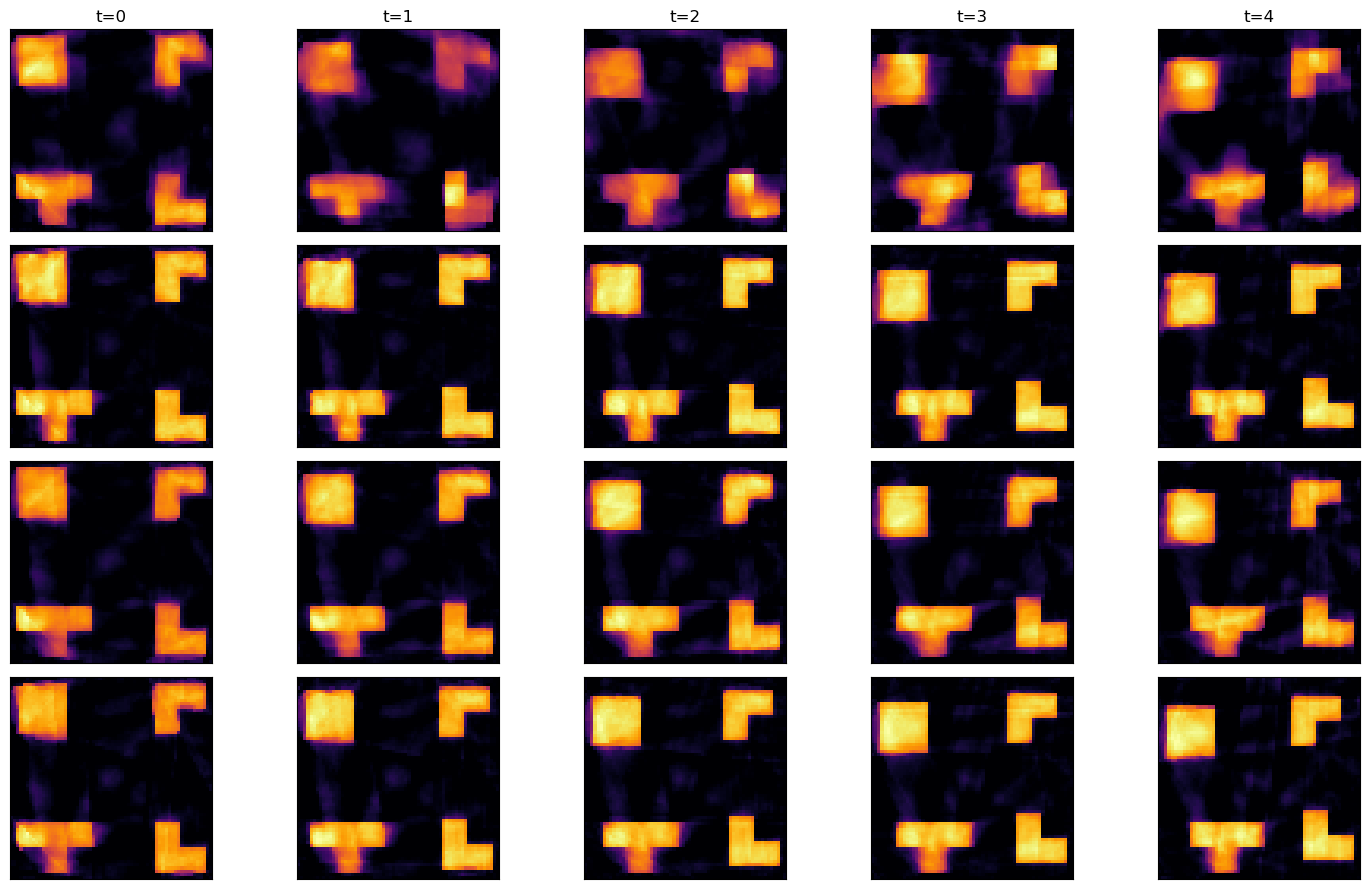

In [ ]:
fig,ax=plt.subplots(4,t_end,figsize=(15,9),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[1,i].imshow(X_mmgks_OF_list[i].reshape(shape))
    ax[3,i].imshow(X_mmgks_OF_dyn_list[i].reshape(shape))
    ax[2,i].imshow(X_aniso_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [38]:

n_iter = 200
n_iter_b = 20
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg = False


# MMGKS

from imports import *
from trips.solvers.MMGKS import *


(X_mmgks, info_mmgks) = MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,opt='nonscaled',delta=delta,non_neg=non_neg)
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS Solution relative error:', error_mmgks)

#GS
nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)
(X_GS, info_GS) = MMGKS(A_bar, data_vec_bar, L, pnorm=2, qnorm= 1, projection_dim=proj_dim, n_iter = n_iter, 
                                regparam = 'dp', x_true = X_true.reshape((-1,1)) , epsilon = epsilon, Gs_option= 'gs', prob_dims = (nx,ny, nt),delta=delta)
error_GS = info_GS['relError'][-1]
X_GS[X_GS<0]=0
X_GS_list = [X_GS[size*i:size*(i+1)] for i in range(t_end)]
print('GS Solution relative error:', error_GS)

## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=2, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 50)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)



running MMGKS...: 100%|██████████| 200/200 [03:13<00:00,  1.03it/s]


MMGKS Solution relative error: 0.3251831008427178


running MMGKS...: 100%|██████████| 200/200 [03:47<00:00,  1.14s/it]


GS Solution relative error: 0.299130342727986


running MMGKS...: 100%|██████████| 200/200 [07:32<00:00,  2.26s/it]


Dynamic MMGKS Solution relative error: 0.2112373871204652


In [70]:
nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)
(X_GS, info_GS) = MMGKS(A_bar, data_vec_bar, L, pnorm=2, qnorm= 1, projection_dim=proj_dim, n_iter = n_iter, 
                                regparam = 'dp', x_true = X_true.reshape((-1,1)) , epsilon = epsilon, Gs_option= 'gs', prob_dims = (nx,ny, nt),delta=delta)
error_GS = info_GS['relError'][-1]
X_GS[X_GS<0]=0
X_GS_list = [X_GS[size*i:size*(i+1)] for i in range(t_end)]
print('GS Solution relative error:', error_GS)

running MMGKS...: 100%|██████████| 200/200 [01:32<00:00,  2.15it/s]

GS Solution relative error: 0.299130342727986


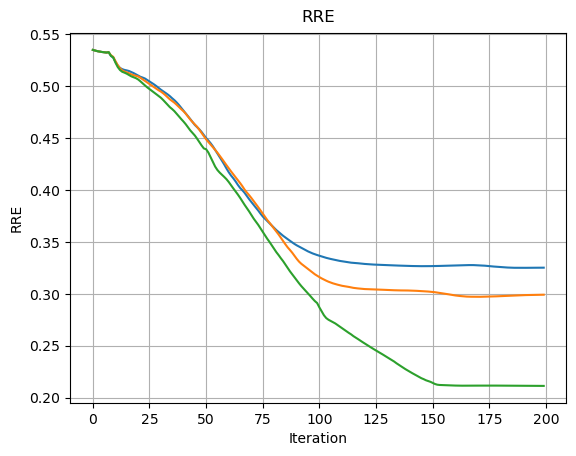

In [39]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_GS['relError'],label='GS')
plt.plot(info_mmgks_dyn['relError'],label='MMGKS-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.title('RRE',va='bottom');

In [40]:
print('RRE_MMGKS',rre_all(X_mmgks,np.array(u_traj),nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,np.array(u_traj),nt,nx,ny))
print('RRE_GS',rre_all(X_GS,np.array(u_traj),nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,np.array(u_traj),nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,np.array(u_traj),nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,np.array(u_traj),nt,nx,ny))

RRE_MMGKS 0.30638613999028186
RRE_MMGKS_DYN 0.19866344520624726
RRE_GS 0.27838399247871604
SSIM_MMGKS 0.928079984393986
SSIM_MMGKS_DYN 0.9713914736054816
SSIM_GS 0.9412454054519894


In [71]:
case_c_folder = 'example_1/case_c'
# np.save(f'{case_c_folder}/X_mmgks.npy',X_mmgks)
# np.save(f'{case_c_folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{case_c_folder}/X_GS.npy',X_GS)
# np.save(f'{case_c_folder}/relError_mmgks.npy',info_mmgks['relError'])
# np.save(f'{case_c_folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{case_c_folder}/relError_GS.npy',info_GS['relError'])
# np.save(f'{case_c_folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
# np.save(f'{case_c_folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{case_c_folder}/regParam_GS.npy',info_GS['regParam_history'])

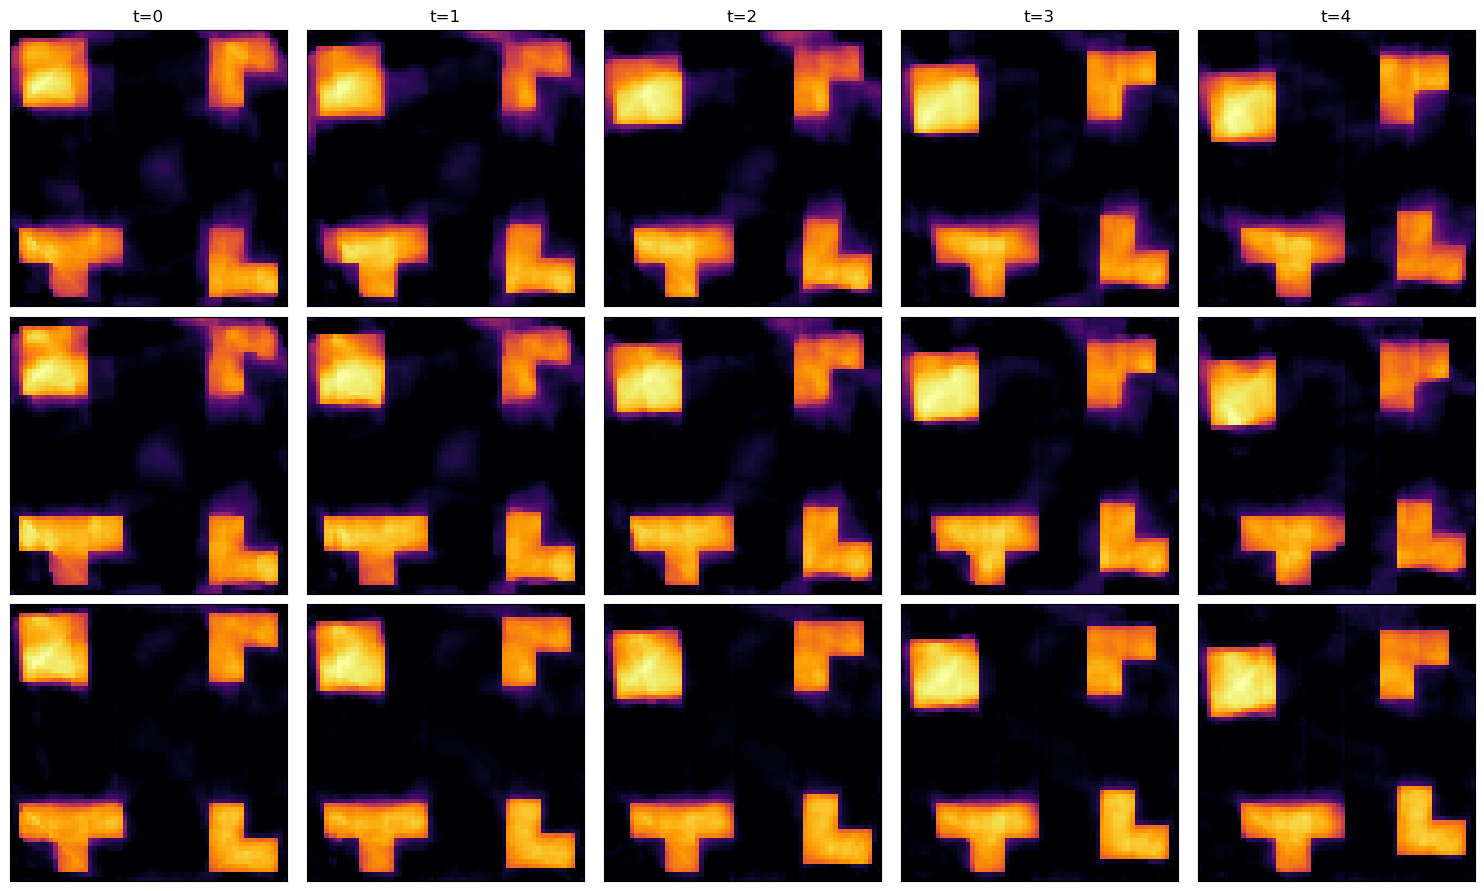

In [44]:
fig,ax=plt.subplots(3,t_end,figsize=(15,9),sharex=True, sharey=True)
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@X_mmgks_dyn_list[::-1][i] #[-1]
#     rec_list.append(next_)
for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[2,i].imshow(X_mmgks_dyn_list[i].reshape(shape))
    ax[1,i].imshow(X_GS_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

## Views: 10; Case:a

In [110]:
#Generate the sinogram and the operator
views = 10
noise_level = 1e-2
x_traj = u_traj


X_true, A_bar,data_vec_bar,data_vec_true_bar,b_shape,L_bar, I_bar,deltas = gen_joint_tomo_op_and_data(x_traj, t_end, nx,ny, views,
                                                                           noise_level, case='a')
b_size = b_shape[0]*b_shape[1]
delta = np.mean(deltas) #la.norm(data_vec_true_bar-data_vec_bar)
print(delta)


[  0.  18.  36.  54.  72.  90. 108. 126. 144. 162.]
[  3.6  21.6  39.6  57.6  75.6  93.6 111.6 129.6 147.6 165.6]
[  7.2  25.2  43.2  61.2  79.2  97.2 115.2 133.2 151.2 169.2]
[ 10.8  28.8  46.8  64.8  82.8 100.8 118.8 136.8 154.8 172.8]
[ 14.4  32.4  50.4  68.4  86.4 104.4 122.4 140.4 158.4 176.4]
4.064630981445313


Text(0.5, 0.98, 'Noisy sinograms of the images in the sequence')

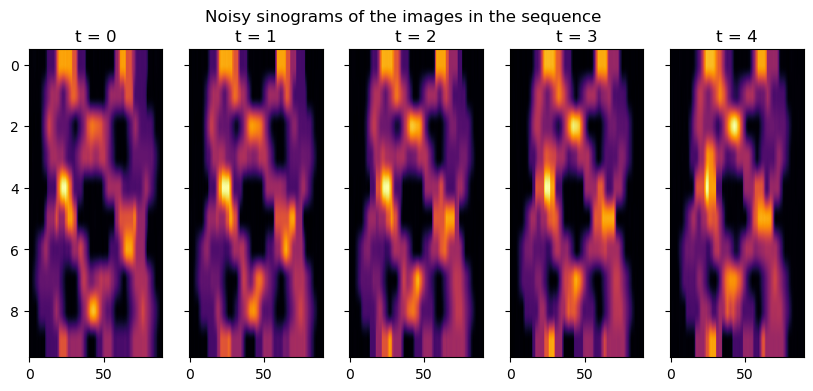

In [111]:
fig,ax=plt.subplots(1,t_end, sharey=True, figsize=(10,4))
data_vec_bar_list_c = [data_vec_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
data_vec_true_bar_list_c = [data_vec_true_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
for i in range(0,t_end):
    ax[i].imshow(data_vec_bar_list_c[i].reshape(b_shape),aspect='auto')
    ax[i].set_title(f't = {i}')
fig.suptitle('Noisy sinograms of the images in the sequence')

In [112]:

n_iter = 200
n_iter_b = 20
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg = False


# MMGKS

from imports import *
from trips.solvers.MMGKS import *


(X_mmgks, info_mmgks) = MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,opt='nonscaled',delta=delta,non_neg=non_neg)
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS Solution relative error:', error_mmgks)

#GS
nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)
(X_GS, info_GS) = MMGKS(A_bar, data_vec_bar, L, pnorm=2, qnorm= 1, projection_dim=proj_dim, n_iter = n_iter, 
                                regparam = 'dp', x_true = X_true.reshape((-1,1)) , epsilon = epsilon, Gs_option= 'gs', prob_dims = (nx,ny, nt),delta=delta)
error_GS = info_GS['relError'][-1]
X_GS[X_GS<0]=0
X_GS_list = [X_GS[size*i:size*(i+1)] for i in range(t_end)]
print('GS Solution relative error:', error_GS)

## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=2, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 50)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)


generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]

running MMGKS...: 100%|██████████| 200/200 [01:09<00:00,  2.86it/s]


MMGKS Solution relative error: 0.09100630859505204


running MMGKS...: 100%|██████████| 200/200 [01:33<00:00,  2.14it/s]


GS Solution relative error: 0.0869144582819482


running MMGKS...: 100%|██████████| 200/200 [05:46<00:00,  1.73s/it]

Dynamic MMGKS Solution relative error: 0.0736939607439942


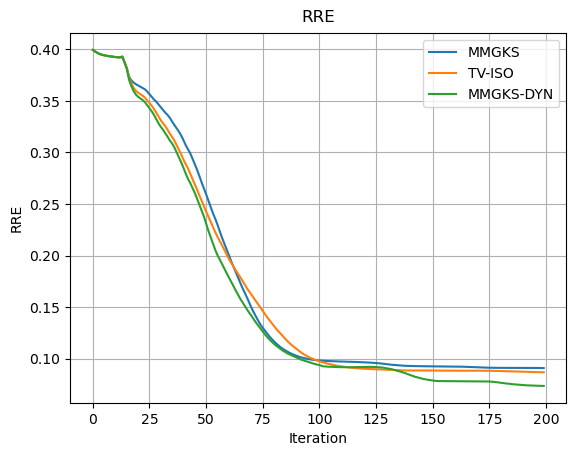

In [113]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_GS['relError'],label='TV-ISO')
plt.plot(info_mmgks_dyn['relError'],label='MMGKS-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

<Figure size 640x480 with 0 Axes>

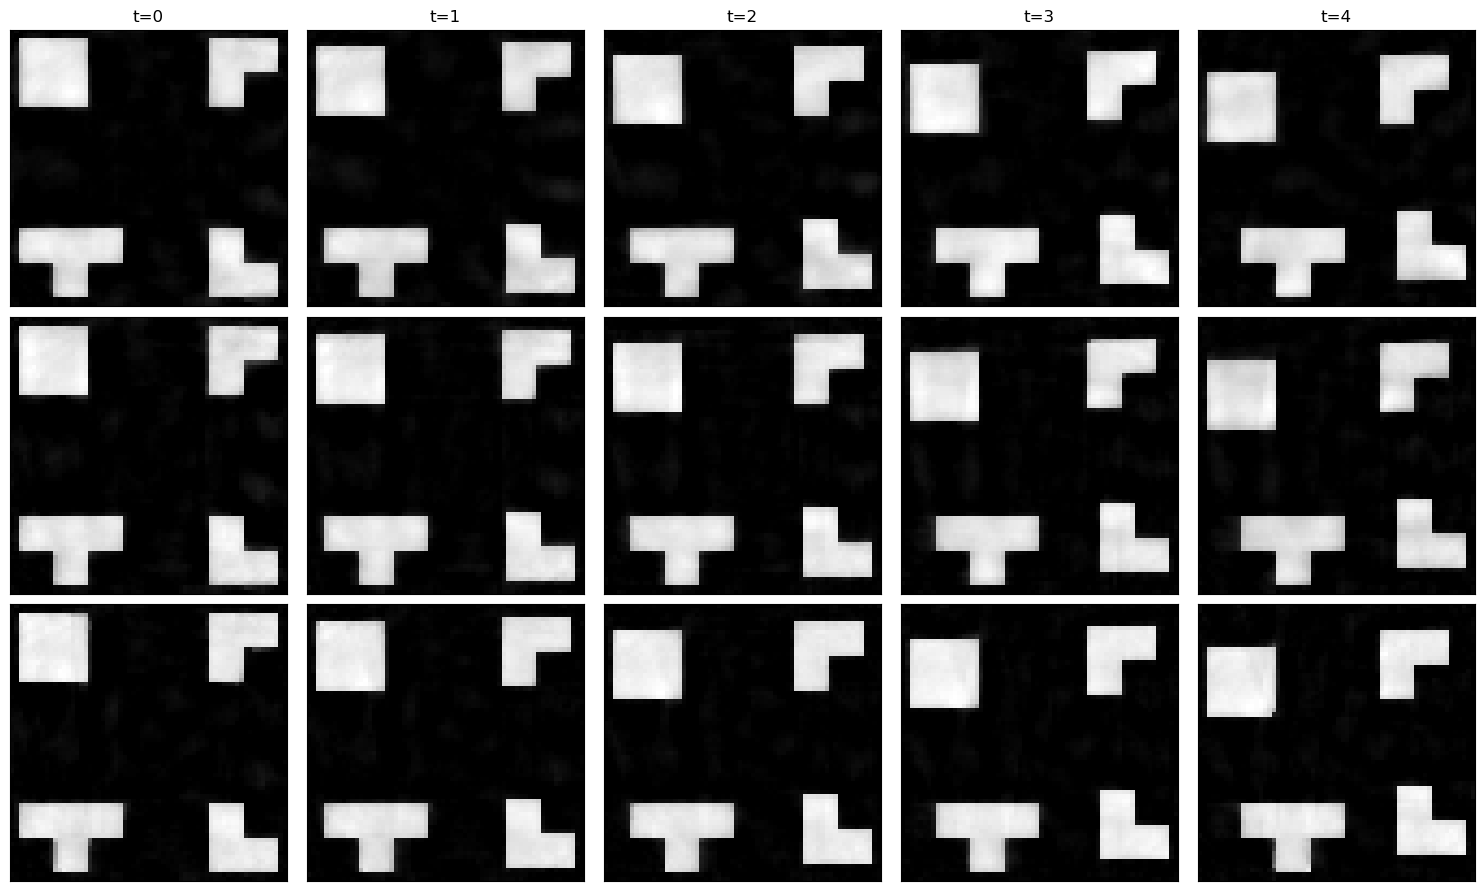

In [115]:
plt.set_cmap('gray')
fig,ax=plt.subplots(3,t_end,figsize=(15,9),sharex=True, sharey=True)
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@X_mmgks_dyn_list[::-1][i] #[-1]
#     rec_list.append(next_)
for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[2,i].imshow(X_mmgks_dyn_list[i].reshape(shape))
    ax[1,i].imshow(X_GS_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [116]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.0811484709569937
RRE_MMGKS_DYN 0.06740959395873472
RRE_GS 0.07776952540579811
SSIM_MMGKS 0.9951028614543835
SSIM_MMGKS_DYN 0.9966970046944397
SSIM_GS 0.9955201609170011


In [117]:
views_10_folder = 'example_1/case_a_views_10'
np.save(f'{views_10_folder}/X_mmgks.npy',X_mmgks)
np.save(f'{views_10_folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{views_10_folder}/X_GS.npy',X_GS)
np.save(f'{views_10_folder}/relError_mmgks.npy',info_mmgks['relError'])
np.save(f'{views_10_folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{views_10_folder}/relError_GS.npy',info_GS['relError'])
np.save(f'{views_10_folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
np.save(f'{views_10_folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{views_10_folder}/regParam_GS.npy',info_GS['regParam_history'])

## Views: 20; Case a

In [119]:
#Generate the sinogram and the operator
views = 20
noise_level = 1e-2
x_traj = u_traj


X_true, A_bar,data_vec_bar,data_vec_true_bar,b_shape,L_bar, I_bar,deltas = gen_joint_tomo_op_and_data(x_traj, t_end, nx,ny, views,
                                                                           noise_level, case='a')
b_size = b_shape[0]*b_shape[1]
delta = np.mean(deltas) #la.norm(data_vec_true_bar-data_vec_bar)
print(delta)


[  0.   9.  18.  27.  36.  45.  54.  63.  72.  81.  90.  99. 108. 117.
 126. 135. 144. 153. 162. 171.]
[  1.8  10.8  19.8  28.8  37.8  46.8  55.8  64.8  73.8  82.8  91.8 100.8
 109.8 118.8 127.8 136.8 145.8 154.8 163.8 172.8]
[  3.6  12.6  21.6  30.6  39.6  48.6  57.6  66.6  75.6  84.6  93.6 102.6
 111.6 120.6 129.6 138.6 147.6 156.6 165.6 174.6]
[  5.4  14.4  23.4  32.4  41.4  50.4  59.4  68.4  77.4  86.4  95.4 104.4
 113.4 122.4 131.4 140.4 149.4 158.4 167.4 176.4]
[  7.2  16.2  25.2  34.2  43.2  52.2  61.2  70.2  79.2  88.2  97.2 106.2
 115.2 124.2 133.2 142.2 151.2 160.2 169.2 178.2]
5.750043334960937


Text(0.5, 0.98, 'Noisy sinograms of the images in the sequence')

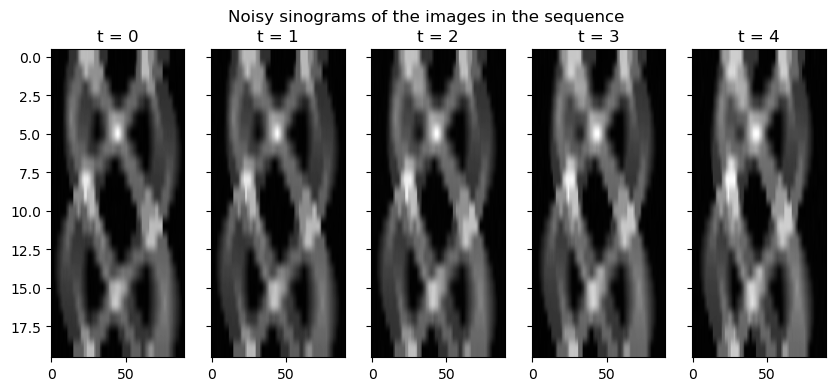

In [120]:
fig,ax=plt.subplots(1,t_end, sharey=True, figsize=(10,4))
data_vec_bar_list_c = [data_vec_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
data_vec_true_bar_list_c = [data_vec_true_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
for i in range(0,t_end):
    ax[i].imshow(data_vec_bar_list_c[i].reshape(b_shape),aspect='auto')
    ax[i].set_title(f't = {i}')
fig.suptitle('Noisy sinograms of the images in the sequence')

In [121]:

n_iter = 200
n_iter_b = 20
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg = False


# MMGKS

from imports import *
from trips.solvers.MMGKS import *


(X_mmgks, info_mmgks) = MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,opt='nonscaled',delta=delta,non_neg=non_neg)
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS Solution relative error:', error_mmgks)

#GS
nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)
(X_GS, info_GS) = MMGKS(A_bar, data_vec_bar, L, pnorm=2, qnorm= 1, projection_dim=proj_dim, n_iter = n_iter, 
                                regparam = 'dp', x_true = X_true.reshape((-1,1)) , epsilon = epsilon, Gs_option= 'gs', prob_dims = (nx,ny, nt),delta=delta)
error_GS = info_GS['relError'][-1]
X_GS[X_GS<0]=0
X_GS_list = [X_GS[size*i:size*(i+1)] for i in range(t_end)]
print('GS Solution relative error:', error_GS)

## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=2, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 50)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...: 100%|██████████| 200/200 [01:54<00:00,  1.75it/s]


MMGKS Solution relative error: 0.03903555415316054


running MMGKS...: 100%|██████████| 200/200 [03:28<00:00,  1.04s/it]


GS Solution relative error: 0.03932157905359811


running MMGKS...:   0%|          | 0/200 [00:00<?, ?it/s]c:\Users\okuno\anaconda3\Lib\site-packages\scipy\sparse\_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
running MMGKS...: 100%|██████████| 200/200 [07:19<00:00,  2.20s/it]


Dynamic MMGKS Solution relative error: 0.039705886004041


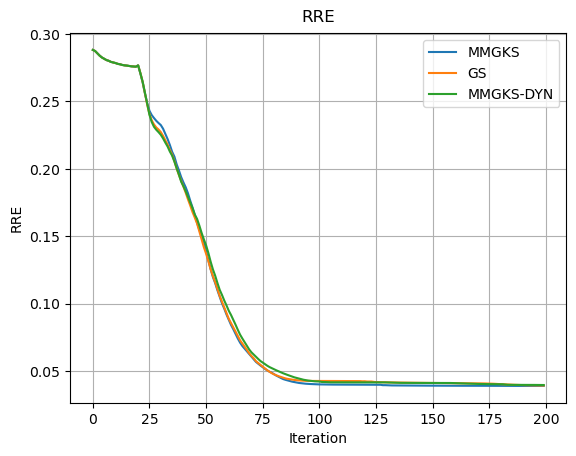

In [122]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_GS['relError'],label='GS')
plt.plot(info_mmgks_dyn['relError'],label='MMGKS-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

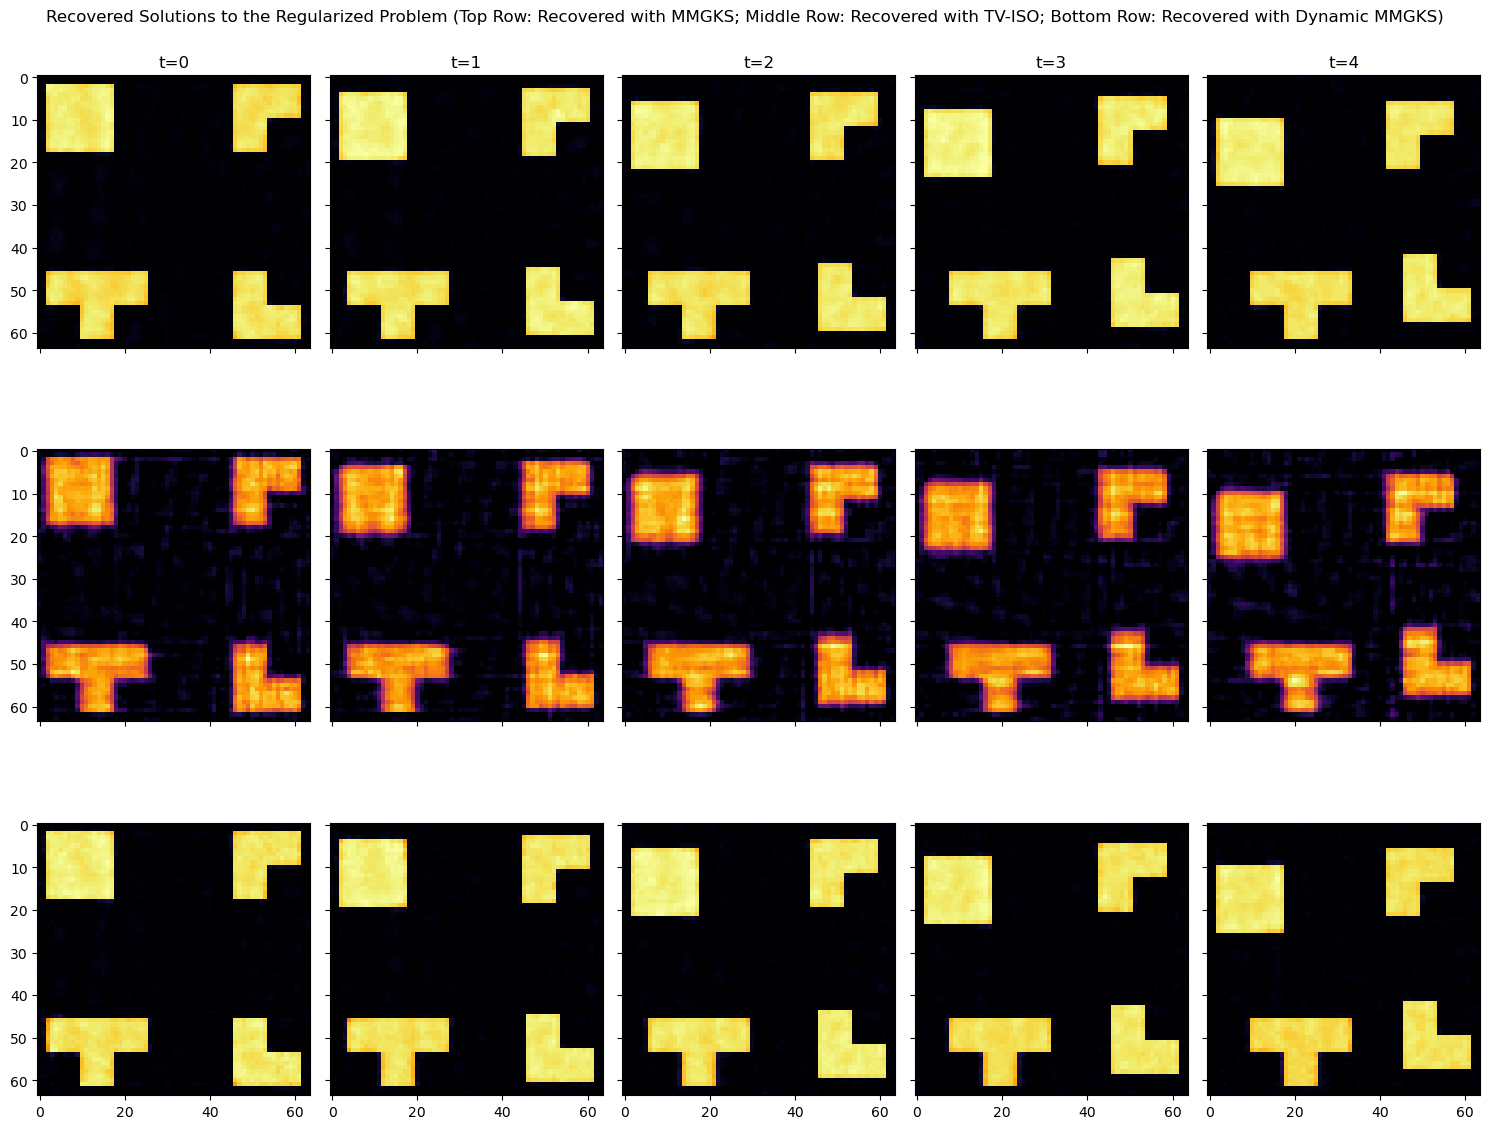

In [24]:
fig,ax=plt.subplots(3,t_end,figsize=(15,12),sharex=True, sharey=True)
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@X_mmgks_dyn_list[::-1][i] #[-1]
#     rec_list.append(next_)
for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[2,i].imshow(X_mmgks_dyn_list[i].reshape(shape))
    ax[1,i].imshow(X_GS_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
                ' Middle Row: Recovered with TV-ISO;'   + 
             ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [123]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.033621274277775524
RRE_MMGKS_DYN 0.03505948978020173
RRE_GS 0.03402843766342721
SSIM_MMGKS 0.9991255502179797
SSIM_MMGKS_DYN 0.9990738906091036
SSIM_GS 0.9991086776275576


In [124]:
views_20_folder = 'example_1/case_a_views_20'
np.save(f'{views_20_folder}/X_mmgks.npy',X_mmgks)
np.save(f'{views_20_folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{views_20_folder}/X_GS.npy',X_GS)
np.save(f'{views_20_folder}/relError_mmgks.npy',info_mmgks['relError'])
np.save(f'{views_20_folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{views_20_folder}/relError_GS.npy',info_mmgks['relError'])
np.save(f'{views_20_folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
np.save(f'{views_20_folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{views_20_folder}/regParam_GS.npy',info_mmgks['regParam_history'])